In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
insurance_data = pd.read_csv("insurance_claims.csv")

# Displaying the first few rows of the dataset
print(insurance_data.head())

   age_of_driver  car_age    region  number_of_claims
0             30        7     Urban                 0
1             33       10     Rural                 2
2             39       11  Suburban                 1
3             18       12     Urban                 0
4             21        8     Urban                 0


In [2]:
# Summary statistics of the dataset
summary_stats = insurance_data.describe(include='all')

# Checking for missing values
missing_values = insurance_data.isnull().sum()

print(summary_stats)

        age_of_driver      car_age region  number_of_claims
count     1000.000000  1000.000000   1000       1000.000000
unique            NaN          NaN      3               NaN
top               NaN          NaN  Rural               NaN
freq              NaN          NaN    343               NaN
mean        33.112000     6.673000    NaN          0.675000
std          9.253598     4.377583    NaN          0.822223
min         18.000000     0.000000    NaN          0.000000
25%         25.000000     3.000000    NaN          0.000000
50%         33.000000     6.000000    NaN          0.000000
75%         41.000000    11.000000    NaN          1.000000
max         49.000000    14.000000    NaN          5.000000


In [3]:
print(missing_values)

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


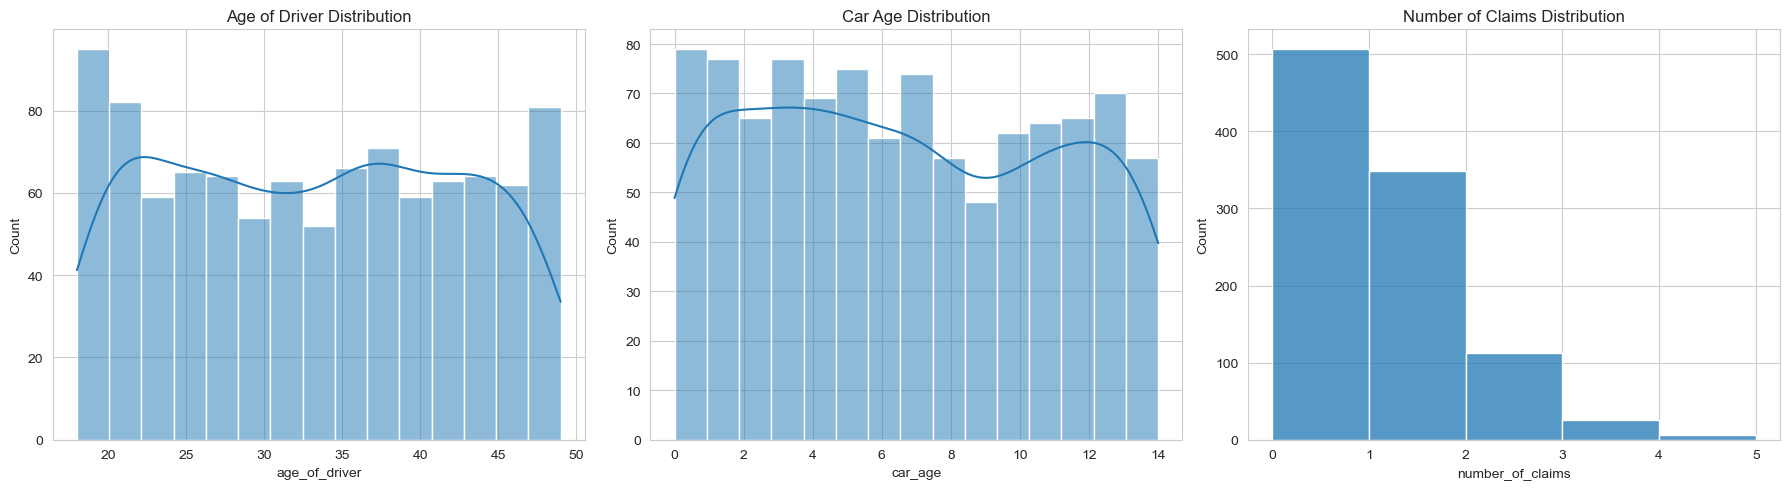

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(insurance_data['age_of_driver'], kde=True, bins=15, ax=ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(insurance_data['car_age'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(insurance_data['number_of_claims'], kde=False, bins=range(6), ax=ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# One-Hot Encoding for 'region' variable
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)

# Splitting the data into training and testing sets
train, test = train_test_split(insurance_data_encoded, test_size=0.2, random_state=42)

print(train.head())

     age_of_driver  car_age  number_of_claims  region_Suburban  region_Urban
29              26       13                 1            False         False
535             42        9                 2             True         False
695             44        8                 1            False         False
557             41        3                 1             True         False
836             31       12                 0            False          True


In [3]:
import pandas as pd
import statsmodels.api as sm

# Sample data creation for demonstration purposes (you should load your actual data here)
# Example:
# train = pd.read_csv('your_data.csv')

# For demonstration, let's create a sample DataFrame similar to your structure
data = {
    'number_of_claims': [1, 2, 0, 1, 0, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1] * 53 + [1, 2, 1, 0],
    'age_of_driver': [25, 35, 45, 55, 65, 30, 40, 50, 60, 70, 33, 43, 53, 63, 73] * 53 + [25, 35, 45, 55],
    'car_age': [1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6] * 53 + [1, 2, 3, 4],
    'region_Suburban': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 53 + [0, 1, 0, 1],
    'region_Urban': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] * 53 + [1, 0, 1, 0]
}
train = pd.DataFrame(data)

# Preparing the data for modeling
X_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

# Adding constant to the predictor variables
X_train_const = sm.add_constant(X_train)

# Building the Poisson GLM model
poisson_glm = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()

# Displaying the model summary
print(poisson_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_claims   No. Observations:                  799
Model:                            GLM   Df Residuals:                      795
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.9
Date:                Sat, 22 Jun 2024   Deviance:                       744.47
Time:                        15:06:33   Pearson chi2:                     610.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06082
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1876      0.156     